DANIEL 

I THINK WE CAN USE YOUR MLAE IS THE BEST FOR OUR CASE WITHOUT MULTIPLYING 100.

====

I RETREIVE TWO DATASET OF ANGLE TASK FOR LLAMA AND FINETUNED LLAMA FOR THIS MLAE TESTING

====

In [2]:
import pandas as pd

from test2function import MLAEAnalyzer

dataset_path = "angle_dataframe"  # Ensure the correct file path


I PLOTTED EACH PREDICTION MLAE VALUE FOR CUSTOM LLAMA AND LLAMA. 

=====

AND I INCLUDE A UNIQUE VALUE FOR ANGLE TASK BELOW

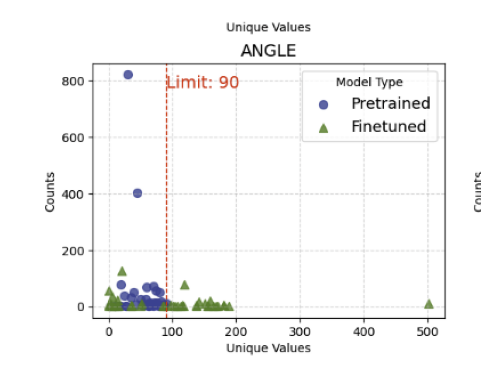

In [1]:
from mlaetest import display_one_image

image_path1 = "Angle.png"

display_one_image(image_path1)

=====

AS YOU CAN SEE, THERE ARE FEWER OUTLIERS FOR THIS TASK IN PRETRAINED MODELS.

IF WE SCALE AND LOG EACH INDIVIDUAL PREDICTION ERROR FIRST, IT MIGHT PUSH ALL MLAE VALUES HIGHER AS THERE ARE FEWER OUTLIERS TO BALANCE THE DISTRIBUTION.

=====

I PLOT MLAE PER PREDICTION FOR EACH CACULATION TO VIEW ERROR DISTRIBUTION.


MLAE values for CustomLLaMA:
MLAE (Original): 12.9935
MLAE_NEW (Log Before Avg): 12.3735
MLAE_RAMI (Real Scale): 6.3518
MLAE_OLD (Haehn 2018): 6.3518

MLAE values for LLaMA:
MLAE (Original): 11.5923
MLAE_NEW (Log Before Avg): 11.1333
MLAE_RAMI (Real Scale): 4.9542
MLAE_OLD (Haehn 2018): 4.9542


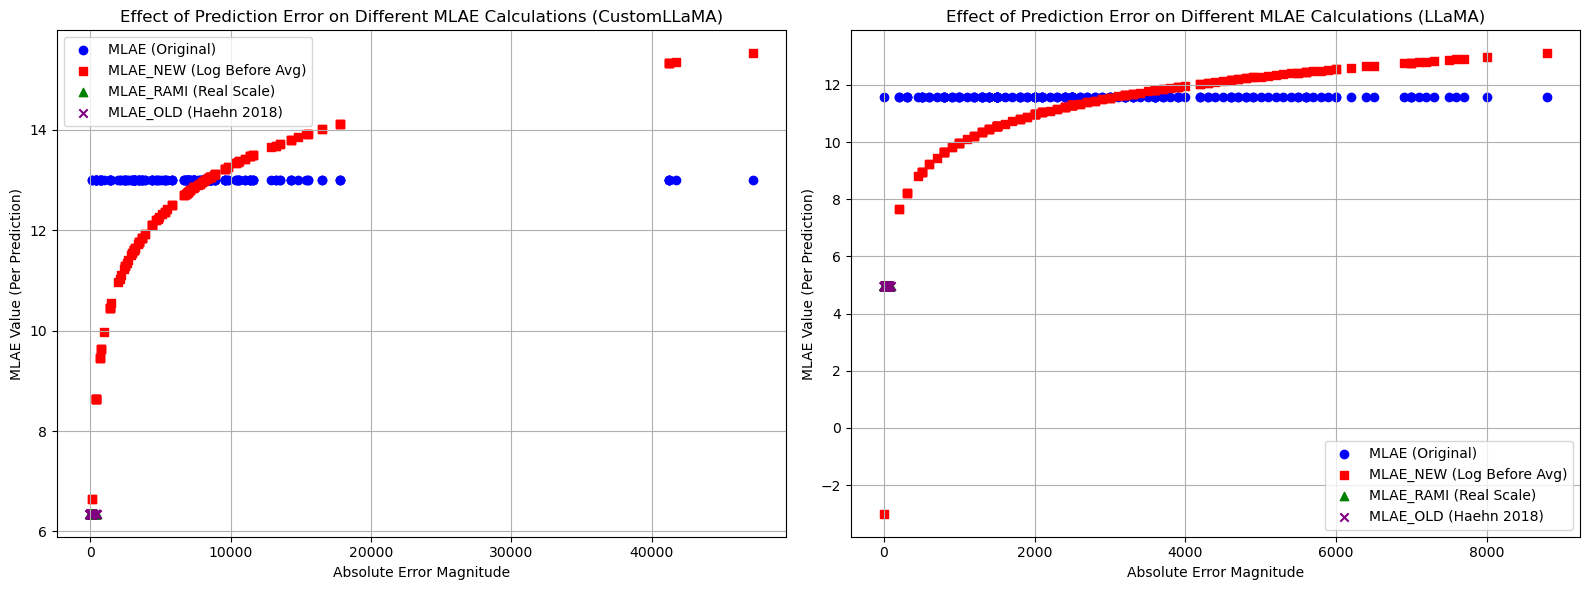

In [3]:
malecomparision = MLAEAnalyzer(dataset_path)
malecomparision.plot_comparison(["CustomLLaMA", "LLaMA"])

For me, MLAE_NEW does not work well in our situation for a few reasons:

- Each error is transformed independently before averaging. This means small errors get exaggerated, and large errors get compressed, distorting the true scale of errors.

- Each model has different outliers. Since outliers affect MLAE differently in each model, MLAE_NEW can make the models harder to compare fairly.

- It changes how errors are distributed, making comparisons between models less reliable. Because MLAE_NEW alters the error scale at the individual level, the overall results may not reflect the actual differences in model performance.


====

I think we should use your MLAE calculation because our goal is to compare overall model performance for each task, not to analyze individual error values. 

By focusing on model-level performance instead of per-error transformations, we get a more stable and meaningful comparison.

MLAE_original 

1. Scale predictions and ground truth values by 100 

2. Compute the MAE on the scaled values

3. Add 0.125 to result 

4. Compute log

==> Compute single MAE for all predictions (then log)


MLAE_NEW 

1. Scale predictions and ground truth values by 100 

2. Caculate absolute error 

3. Add 0.125

4. Compute log

5. Compute the mean all logs- error

==> Caculate log error for each prediction, then average log error 

MLAE_RAMI and MLAE OLD

1. Compute MAE 

2. Add 0.125

3. Compute log